<a href="https://colab.research.google.com/github/iKatePy/Study_projects/blob/master/ML_HW_2_(edited).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

In [120]:
df = pd.read_csv('bank_fin.csv', sep = ';')

Вычислим среднее значение по преобразованному в корректный вид признаку balance. Ответ округлим до трёх знаков после точки-разделителя.

In [121]:
# Преобразуем balance в числовой формат
df['balance'] = df['balance'].str.replace(' ', '').str.replace('$', '').str.replace(',', '.').astype(float)

# Вычисляем среднее значение и округляем до 3 знаков
mean_balance = df['balance'].mean().round(3)
print(f"Среднее значение balance: {mean_balance}")

Среднее значение balance: 1529.129


Итак, значения в признаке balance приобрели нормальный вид, и теперь мы можем обработать пропуски, которые в нём присутствуют. Конечно, пропуски можно было бы просто удалить, но мы поступим по-другому: заменим пропуски на медианное значение по этому признаку.
Вычислим среднее значение по преобразованному в корректный вид признаку balance. Ответ округлим до трёх знаков после точки-разделителя.

In [122]:
median_balance = df['balance'].median()
df['balance'] = df['balance'].fillna(median_balance)

print(f"Количество пропусков после обработки: {df['balance'].isna().sum()}")
print(f"Тип данных столбца: {df['balance'].dtype}")
mean_balance = df['balance'].mean().round(3)
print(f"Среднее значение balance: {mean_balance}")

Количество пропусков после обработки: 0
Тип данных столбца: float64
Среднее значение balance: 1526.936




Ранее мы выяснили, что в признаке job есть пропущенные значения, которые не отображаются как пропуски в явном виде. Однако нам всё равно важно их обработать. Мы знаем, что для категориальных признаков пропущенные значения заменяются модой по данному признаку.

Заменим все пропущенные значения в признаке job на модальные. То же самое сделаем с признаком, отвечающим за уровень образования.

После замены пропусков рассчитаем средний баланс для клиентов с самой популярной работой и самым популярным уровнем образования (т. е. для тех, у кого одновременно самая популярная работа и самое популярное образование). Ответ округлим до трёх знаков после точки-разделителя.


In [123]:
# Заменяем все варианты пропущенных значений в job на моду
most_common_job = df['job'].mode()[0]
df['job'] = df['job'].replace(['unknown', ''], most_common_job)

# Заменяем все варианты пропущенных значений в education на моду
most_common_education = df['education'].mode()[0]
df['education'] = df['education'].replace(['unknown', ''], most_common_education)

# Находим самую популярную работу и образование
most_common_job = df['job'].mode()[0]
most_common_education = df['education'].mode()[0]

# Фильтруем клиентов с самой популярной работой и образованием
filtered_df = df[(df['job'] == most_common_job) &
                (df['education'] == most_common_education)]

# Рассчитываем средний баланс и округляем до 3 знаков
mean_balance = filtered_df['balance'].mean().round(4)

print(f"Самая популярная работа: {most_common_job}")
print(f"Самое популярное образование: {most_common_education}")
print(f"Средний баланс для этой группы клиентов: {mean_balance}")

Самая популярная работа: management
Самое популярное образование: secondary
Средний баланс для этой группы клиентов: 1598.883


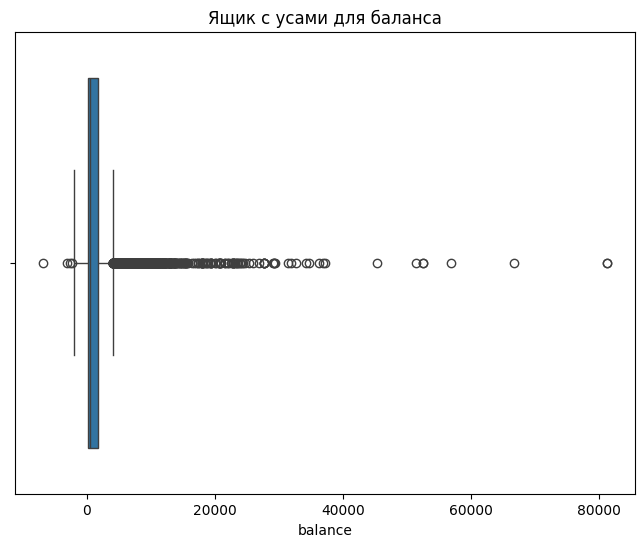

In [124]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['balance'].dropna())
plt.title('Ящик с усами для баланса')
plt.show()

Изучим признак, отображающий баланс клиентов, на предмет выбросов.

В математической статистике есть несколько подходов, позволяющих определить наличие выбросов. Мы будем считать, что выбросы находятся за пределами отрезка, нижняя граница которого определяется как нижний квартиль, из которого вычли полтора межквартильных размаха (
) , а верхняя граница — как верхний квартиль, к которому прибавили полтора межквартильных размаха. (

). Найдем эти границы, и отфильтруем значения так, чтобы выбросов в данных не осталось.
Несмотря на то что существуют более продвинутые методы поиска аномальных значений, для обработки одного числового признака достаточно хорошо подходит метод Тьюки.

Границы для выбросов: [-2241.00, 4063.00]
Исходное количество записей: 11162
Количество записей после удаления выбросов: 10105
Удалено записей: 1057


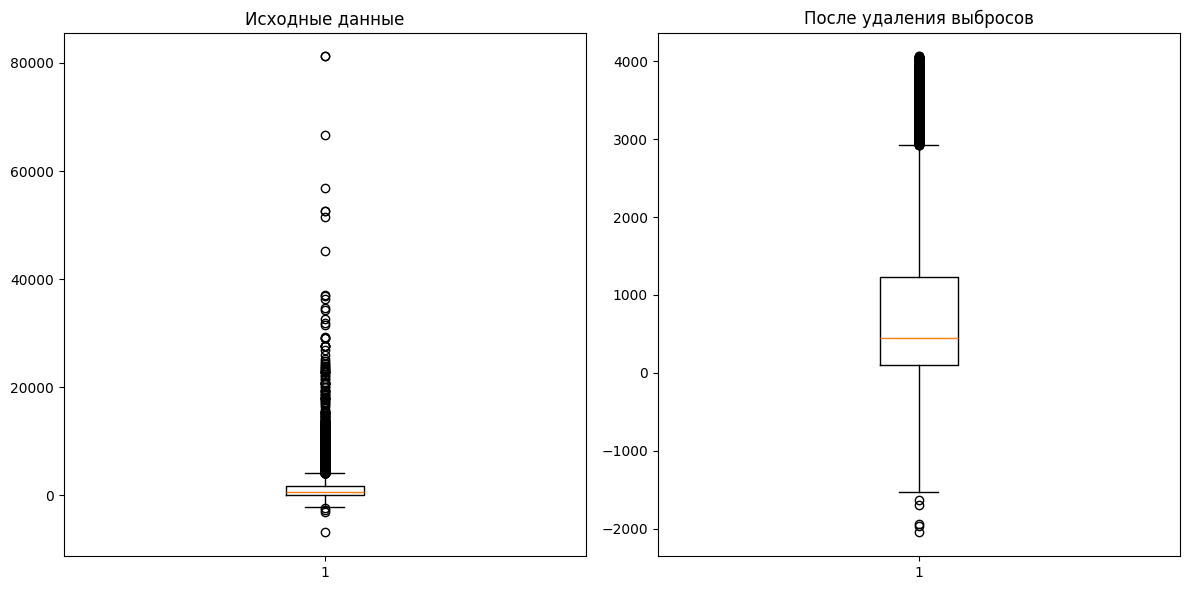

In [125]:
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Границы для выбросов: [{lower_bound:.2f}, {upper_bound:.2f}]")

# Фильтруем данные, оставляя только значения внутри границ
df_filtered = df[(df['balance'] >= lower_bound) & (df['balance'] <= upper_bound)]

# Сравниваем размеры до и после фильтрации
print(f"Исходное количество записей: {len(df)}")
print(f"Количество записей после удаления выбросов: {len(df_filtered)}")
print(f"Удалено записей: {len(df) - len(df_filtered)}")

# Визуализируем результат
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df['balance'].dropna())
plt.title('Исходные данные')

plt.subplot(1, 2, 2)
plt.boxplot(df_filtered['balance'])
plt.title('После удаления выбросов')

plt.tight_layout()
plt.show()


Изучим распределение целевой переменной: есть ли несбалансированность классов? Чтобы это определить, вычислим частоты для открывших депозит и для тех, кто его не открыл. Сопроводим числа диаграммой, отражающей полученные результаты.

In [126]:
print(df_filtered['deposit'].unique())

['yes' 'no']


In [127]:
print(f"Клиенты не открывшие депозит: {(df_filtered['deposit'] == 'no').sum()}")
print(f"Клиенты открывшие депозит: {(df_filtered['deposit'] == 'yes').sum()}")

Клиенты не открывшие депозит: 5424
Клиенты открывшие депозит: 4681


In [128]:
print(df_filtered.describe())

                age       balance           day      duration      campaign  \
count  10105.000000  10105.000000  10105.000000  10105.000000  10105.000000   
mean      40.895497    807.653538     15.590302    368.742603      2.517170   
std       11.734931    994.151966      8.441510    346.651524      2.707159   
min       18.000000  -2049.000000      1.000000      2.000000      1.000000   
25%       32.000000     95.000000      8.000000    137.000000      1.000000   
50%       38.000000    445.000000     15.000000    252.000000      2.000000   
75%       48.000000   1227.000000     22.000000    490.000000      3.000000   
max       95.000000   4063.000000     31.000000   3881.000000     43.000000   

              pdays      previous  
count  10105.000000  10105.000000  
mean      51.319644      0.816230  
std      109.644179      2.243795  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%        2.000000      1.000000  


In [129]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10105 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        10105 non-null  int64  
 1   job        10105 non-null  object 
 2   marital    10105 non-null  object 
 3   education  10105 non-null  object 
 4   default    10105 non-null  object 
 5   balance    10105 non-null  float64
 6   housing    10105 non-null  object 
 7   loan       10105 non-null  object 
 8   contact    10105 non-null  object 
 9   day        10105 non-null  int64  
 10  month      10105 non-null  object 
 11  duration   10105 non-null  int64  
 12  campaign   10105 non-null  int64  
 13  pdays      10105 non-null  int64  
 14  previous   10105 non-null  int64  
 15  poutcome   10105 non-null  object 
 16  deposit    10105 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


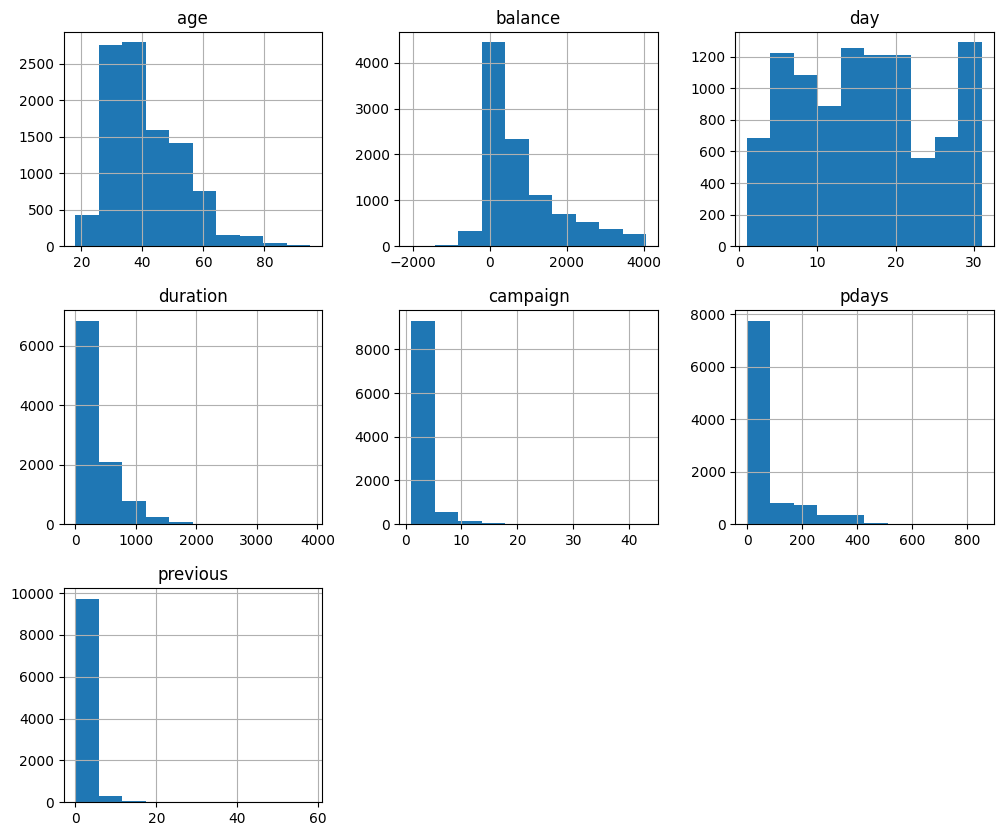

In [130]:
# Визуализация распределений
df_filtered.hist(figsize=(12, 10))
plt.show()

Интерпретация результата:

Средний возраст 40.7 лет, большинство клиентов в диапазоне 32 - 48 лет, минимальный возраст 18 лет, максимальный - 95. Аудитория представляет все возрастные группы, но фокуч на клиентах среднего возраста

Средний баланс 61 тыс., но высокая дисперсия (стандартное отклонение 69.6 тыс.). Выбросы: Минимум -63.9 тыс. (возможны кредитные счета или ошибки), максимум 264.6 тыс. (крупные вложения). Медиана: 38.1 тыс. — 50% клиентов имеют баланс до 38 тыс., что указывает на асимметрию (большинство — малые/средние счета).

Распределение: Средний день контакта — 15-й (середина месяца), диапазон 1–31. Контакты равномерно распределены в течение месяца, без явных пиков.

Средняя длительность: 367 секунд (6 минут), но сильный разброс (от 2 сек до 3881 сек — 65 минут). Медиана: 251 секунда (4.2 минуты) — у 50% клиентов контакт длится до 4 минут. Есть клиенты с очень долгим взаимодействием (возможно, сложные случаи или ошибки в данных).

Среднее: 2.54 контакта на клиента, но максимум — 43 (аномально высокое значение). Медиана: 2 контакта — большинство клиентов контактируют 1–3 раза. Риск: Клиенты с числом контактов >10 могут быть перегружены (спам/навязчивые предложения).

pdays (дней с последнего контакта): У большинства клиентов не было предыдущих контактов (медиана и 75%-квартиль = -1). Максимум 854 дня: Некоторые клиенты контактировали более 2 лет назад (редкие случаи).

previous (число предыдущих контактов): Среднее: 0.81, но медиана = 0 — у большинства клиентов не было контактов. Максимум 58: Возможны ошибки или агрессивный маркетинг.

Рекомендации: Очистка данных: возможно, удалить записи с balance < 0 и campaign > 10. Анализ долгих звонков: Выделить причины высокой длительности (duration). Фокус на вовлеченность: Увеличить число повторных контактов (previous), избегая спама.

Возможно, люди, которые уже однажды согласились на предложение банка, более склонны принять его вновь. А возможно, ситуация ровно обратная. Узнаем, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.

In [131]:
df_filtered.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,10105,10105,10105,10105,10105,10105,10105,10105,10105,10105
unique,11,3,3,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2315,5715,5517,9939,5243,8712,7283,2617,7570,5424


Информация о 10 105 клиентах банка с различными категориальными признаками. Среди профессий клиентов выделяется 11 уникальных вариантов, при этом наиболее часто встречается категория "management" - менеджеры составляют около 23% всех клиентов. По семейному положению клиентов три категории, и большинство из них состоят в браке, что составляет примерно 57% выборки. Образование клиентов представлено тремя уровнями, при этом преобладает среднее образование, которым обладает около 55% клиентов.

Очень важно отметить, что почти все клиенты не имеют кредитного дефолта - таких всего около 1,6%. В отношении жилищных кредитов примерно половина клиентов их не имеют, а личные кредиты отсутствуют у подавляющего большинства - около 86%. Способ связи с клиентами представлен тремя вариантами, и мобильный телефон является наиболее популярным каналом, используемым примерно в 72% случаев.

Маркетинговая кампания охватывала все 12 месяцев года, причем наибольшее количество контактов приходится на май, около 26% от общего числа. Результат предыдущей кампании чаще всего неизвестен - это касается примерно 75% клиентов, что может усложнять анализ эффективности кампаний. Целевой признак - оформление депозита - показывает, что более половины клиентов не оформили депозит, что требует дополнительного изучения факторов, влияющих на их решение.

В целом, данные дают представление о типичных клиентах банка и особенностях их взаимодействия с маркетинговыми кампаниями, что важно учитывать при дальнейшем анализе и построении моделей.

In [132]:
print(df_filtered.groupby('poutcome')['deposit'].value_counts(normalize=True))

poutcome  deposit
failure   no         0.506763
          yes        0.493237
other     yes        0.550936
          no         0.449064
success   yes        0.911111
          no         0.088889
unknown   no         0.602642
          yes        0.397358
Name: proportion, dtype: float64


Полезно посмотреть, люди какого возраста чаще открывают депозиты, а какого — реже. Однако, так как возрастной разброс достаточно большой, визуализация для всех возрастов или нахождение статистики для каждого возраста не будут содержательными. В аналитике принято разделять людей по возрастным подгруппам и делать выводы уже по ним.

Создадим новую переменную, в которой будет находиться индикатор принадлежности к одной из следующих категорий:

    '<30';
    '30-40';
    '40-50';
    '50-60';
    '60+'.

После создания этой переменной построим диаграмму, которая сможет наилучшим образом отобразить различия в количестве открытых или не открытых депозитов для каждой возрастной группы.

Выберем из списка две возрастные группы, которые более склонны открывать депозит, чем отказываться от открытия депозита в банке после рекламного предложения.

age_group  deposit
<30        yes        0.562032
           no         0.437968
30-40      no         0.576523
           yes        0.423477
40-50      no         0.603104
           yes        0.396896
50-60      no         0.574154
           yes        0.425846
60+        yes        0.810916
           no         0.189084
Name: proportion, dtype: float64


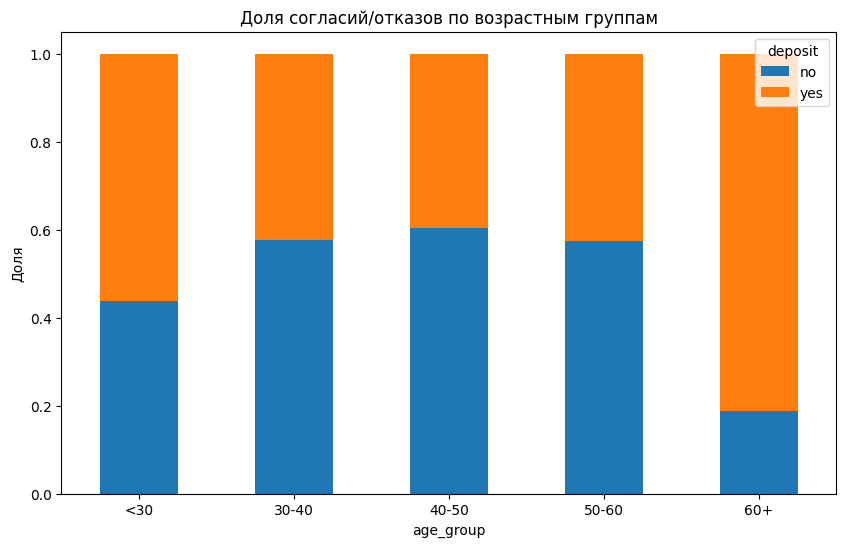

In [133]:
df_filtered['age_group'] = pd.cut(df_filtered['age'], bins=[0, 30, 40, 50, 60, 100], labels=['<30', '30-40', '40-50', '50-60', '60+'])
print(df_filtered.groupby('age_group')['deposit'].value_counts(normalize=True))

# Данные для графика
age_deposit = df_filtered.groupby('age_group')['deposit'].value_counts(normalize=True).unstack()

# Построение
age_deposit.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Доля согласий/отказов по возрастным группам')
plt.ylabel('Доля')
plt.xticks(rotation=0)
plt.show()

При каком семейном положении есть тенденция открывать депозит, а не отказываться от его открытия?

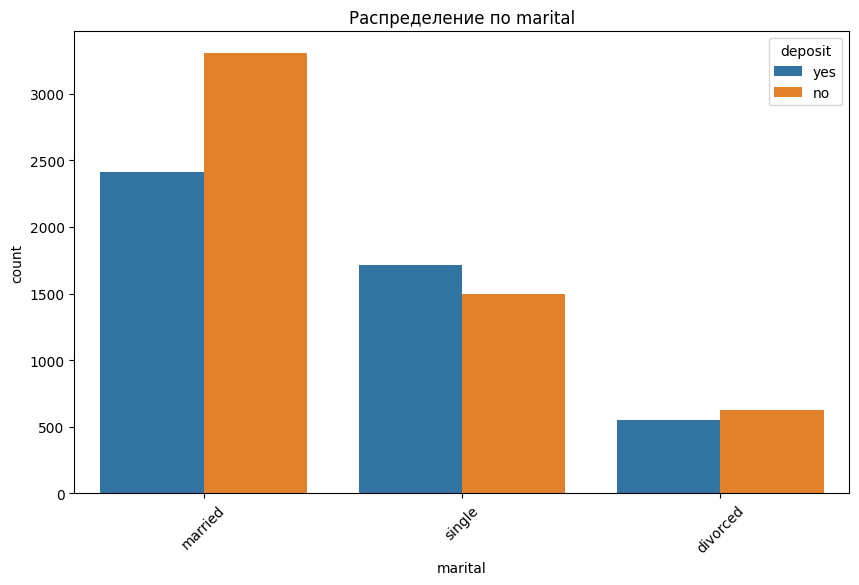

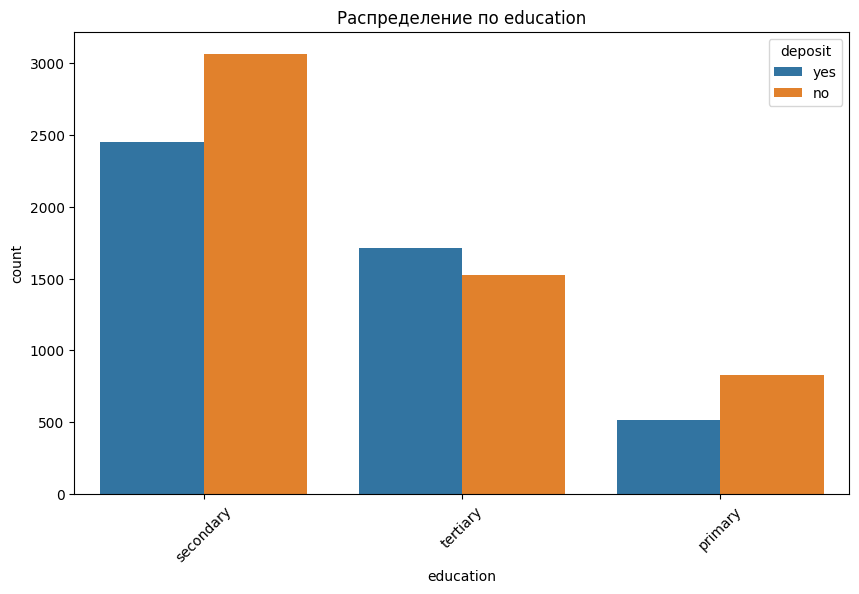

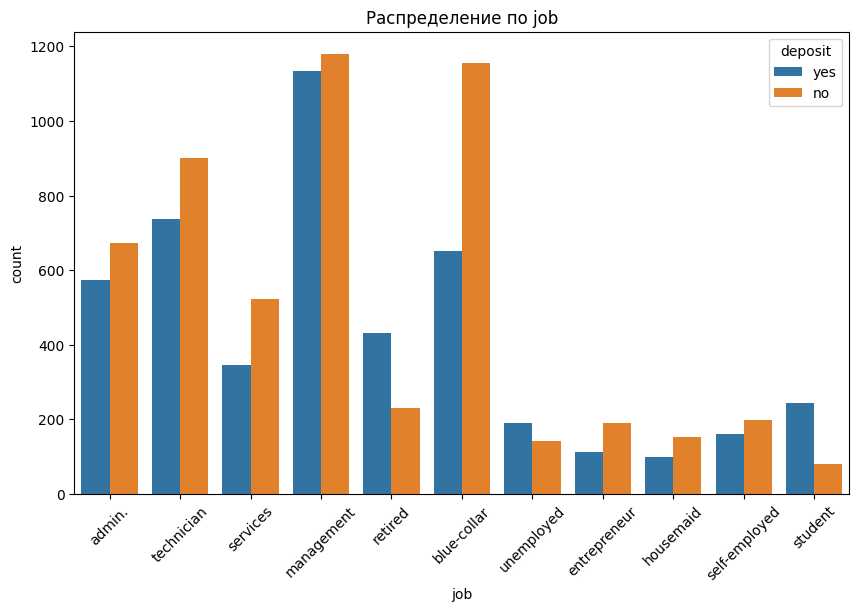

In [134]:
for col in ['marital', 'education', 'job']:
    plt.figure(figsize=(10,6))
    sns.countplot(x=col, hue='deposit', data=df_filtered)
    plt.title(f'Распределение по {col}')
    plt.xticks(rotation=45)
    plt.show()



Что будет, если посмотреть на пересечения категорий? Каких людей среди открывших депозит больше: одиноких с высшим образованием или разведённых с более низким уровнем образования?

Разделим таблицу на две части: для тех, кто открыл депозит, и для тех, кто не открыл. Для каждой части построим сводную диаграмму по уровню образования и семейному положению. Представим результаты в виде тепловых карт.

In [135]:
# построим сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны

# Сводная таблица с абсолютными значениями
cross_abs = pd.crosstab(
    index=[df_filtered['education'], df_filtered['marital']],
    columns=df_filtered['deposit']
)

# Добавление столбца с общим числом людей в группе
cross_abs['total'] = cross_abs.sum(axis=1)

# Сортировка по убыванию
cross_abs_sorted = cross_abs.sort_values('total', ascending=False)
print(cross_abs_sorted[['total']])

deposit             total
education marital        
secondary married    3119
          single     1745
tertiary  married    1616
          single     1286
primary   married     980
secondary divorced    653
tertiary  divorced    337
primary   divorced    187
          single      182


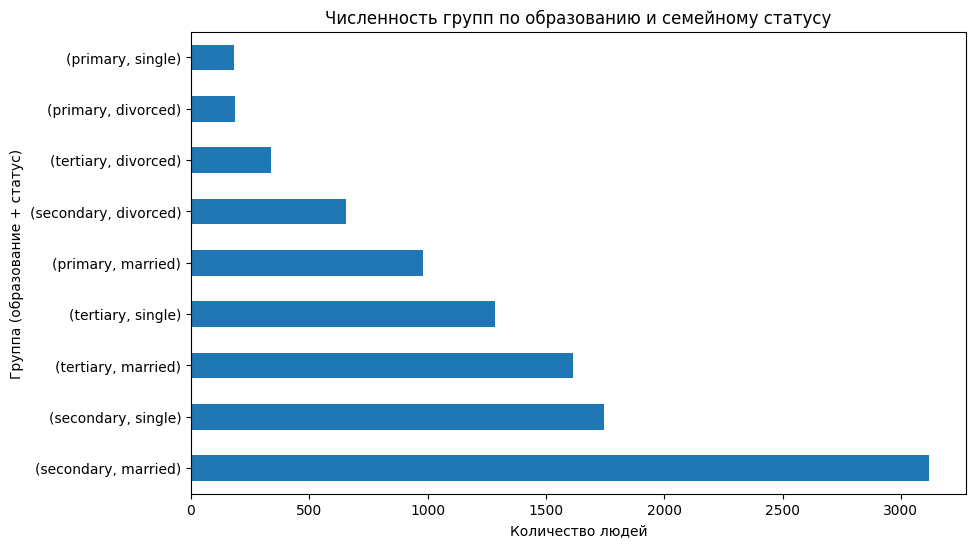

In [136]:
# Данные из cross_abs_sorted
cross_abs_sorted['total'].plot(kind='barh', figsize=(10, 6))
plt.title('Численность групп по образованию и семейному статусу')
plt.xlabel('Количество людей')
plt.ylabel('Группа (образование + статус)')
plt.show()



Начнём с обработки категориального порядкового признака, который отвечает за уровень образования — education.

Обработаем его с помощью метода LabelEncoder, используя метод без дополнительных настроек.
Найдем сумму получившихся значений для признака education.


In [148]:
# Создаем экземпляр энкодера
le = LabelEncoder()

# Применяем к столбцу education
df_filtered['education_encoded'] = le.fit_transform(df_filtered['education'])

# Проверяем результат
print("Соответствие категорий и чисел:")
for i, cat in enumerate(le.classes_):
    print(f"{cat} → {i}")
sum_education = df_filtered['education_encoded'].sum()
print(f"Сумма закодированных значений: {sum_education}")
print("\nРаспределение закодированных значений:")
print(df_filtered['education_encoded'].value_counts().sort_index())

Соответствие категорий и чисел:
primary → 0
secondary → 1
tertiary → 2
Сумма закодированных значений: 11995

Распределение закодированных значений:
education_encoded
0    1349
1    5517
2    3239
Name: count, dtype: int64


-Ранее мы создали порядковую переменную для возраста. Обработаем её по такому же принципу, чтобы её можно было использовать при обучении модели.

Обычно в задачах бинарной классификации целевую переменную кодируют как бинарный признак, который принимает значения 1 или 0. Так как наш проект будет соответствовать всем правилам хорошего тона, перекодируем переменную deposit таким образом, чтобы вместо yes она принимала значение 1, а вместо no — 0.


In [149]:
# Создаем экземпляр энкодера
le_age = LabelEncoder()

# Применяем к столбцу age_group
df_filtered['age_group_encoded'] = le_age.fit_transform(df_filtered['age_group'])

# Проверяем результат
print("Соответствие категорий и чисел для age_group:")
for i, cat in enumerate(le_age.classes_):
    print(f"{cat} → {i}")

sum_age_group = df_filtered['age_group_encoded'].sum()
print(f"Сумма закодированных значений age_group: {sum_age_group}")

print("\nРаспределение закодированных значений age_group:")
print(df_filtered['age_group_encoded'].value_counts().sort_index())

Соответствие категорий и чисел для age_group:
30-40 → 0
40-50 → 1
50-60 → 2
60+ → 3
<30 → 4
Сумма закодированных значений age_group: 14524

Распределение закодированных значений age_group:
age_group_encoded
0    3842
1    2255
2    1625
3     513
4    1870
Name: count, dtype: int64


In [139]:
binary_cols = ['default', 'housing', 'loan', 'deposit']
for col in binary_cols:
    df_filtered[col] = df_filtered[col].map({'no': 0, 'yes': 1})

Вычислим стандартное отклонение по преобразованной в корректный вид целевой переменной deposit. Ответ округлим до трёх знаков после точки-разделителя.

Вычислим среднее арифметическое для каждой из получившихся переменных, сложим три результата

In [140]:
std_deposit = df_filtered['deposit'].std()
print("Стандартное отклонение deposit:", std_deposit)
mean_default = df_filtered['default'].mean().round(3)
print("Среднее арифметическое default:", mean_default)

mean_housing = df_filtered['housing'].mean().round(3)
print("Среднее арифметическое housing:", mean_housing)

mean_loan = df_filtered['loan'].mean().round(3)
print("Среднее арифметическое loan:", mean_loan)

print("Сумма:", mean_default + mean_housing + mean_loan)

Стандартное отклонение deposit: 0.4986712532451993
Среднее арифметическое default: 0.016
Среднее арифметическое housing: 0.481
Среднее арифметическое loan: 0.138
Сумма: 0.635




Теперь нам необходимо преобразовать номинальные переменные, которые могут принимать несколько различных значений. Это следующие переменные:

    'job';
    'marital';
    'contact';
    'month';
    'poutcome'.

Создадим для них dummy-переменные и добавим их в набор данных.


In [141]:
df_dummies = pd.get_dummies(df_filtered, columns=['job', 'marital', 'contact', 'month', 'poutcome'])
print(df_dummies.dtypes)

age                     int64
education              object
default                 int64
balance               float64
housing                 int64
loan                    int64
day                     int64
duration                int64
campaign                int64
pdays                   int64
previous                int64
deposit                 int64
age_group            category
education_encoded       int64
age_group_encoded       int64
job_admin.               bool
job_blue-collar          bool
job_entrepreneur         bool
job_housemaid            bool
job_management           bool
job_retired              bool
job_self-employed        bool
job_services             bool
job_student              bool
job_technician           bool
job_unemployed           bool
marital_divorced         bool
marital_married          bool
marital_single           bool
contact_cellular         bool
contact_telephone        bool
contact_unknown          bool
month_apr                bool
month_aug 

In [143]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10105 entries, 0 to 11161
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age                10105 non-null  int64   
 1   education          10105 non-null  object  
 2   default            10105 non-null  int64   
 3   balance            10105 non-null  float64 
 4   housing            10105 non-null  int64   
 5   loan               10105 non-null  int64   
 6   day                10105 non-null  int64   
 7   duration           10105 non-null  int64   
 8   campaign           10105 non-null  int64   
 9   pdays              10105 non-null  int64   
 10  previous           10105 non-null  int64   
 11  deposit            10105 non-null  int64   
 12  age_group          10105 non-null  category
 13  education_encoded  10105 non-null  int64   
 14  age_group_encoded  10105 non-null  int64   
 15  job_admin.         10105 non-null  bool    
 16  job_blue-

In [150]:
df_no_ed = df_dummies.drop(columns=['education', 'age_group'])

Построим тепловую карту

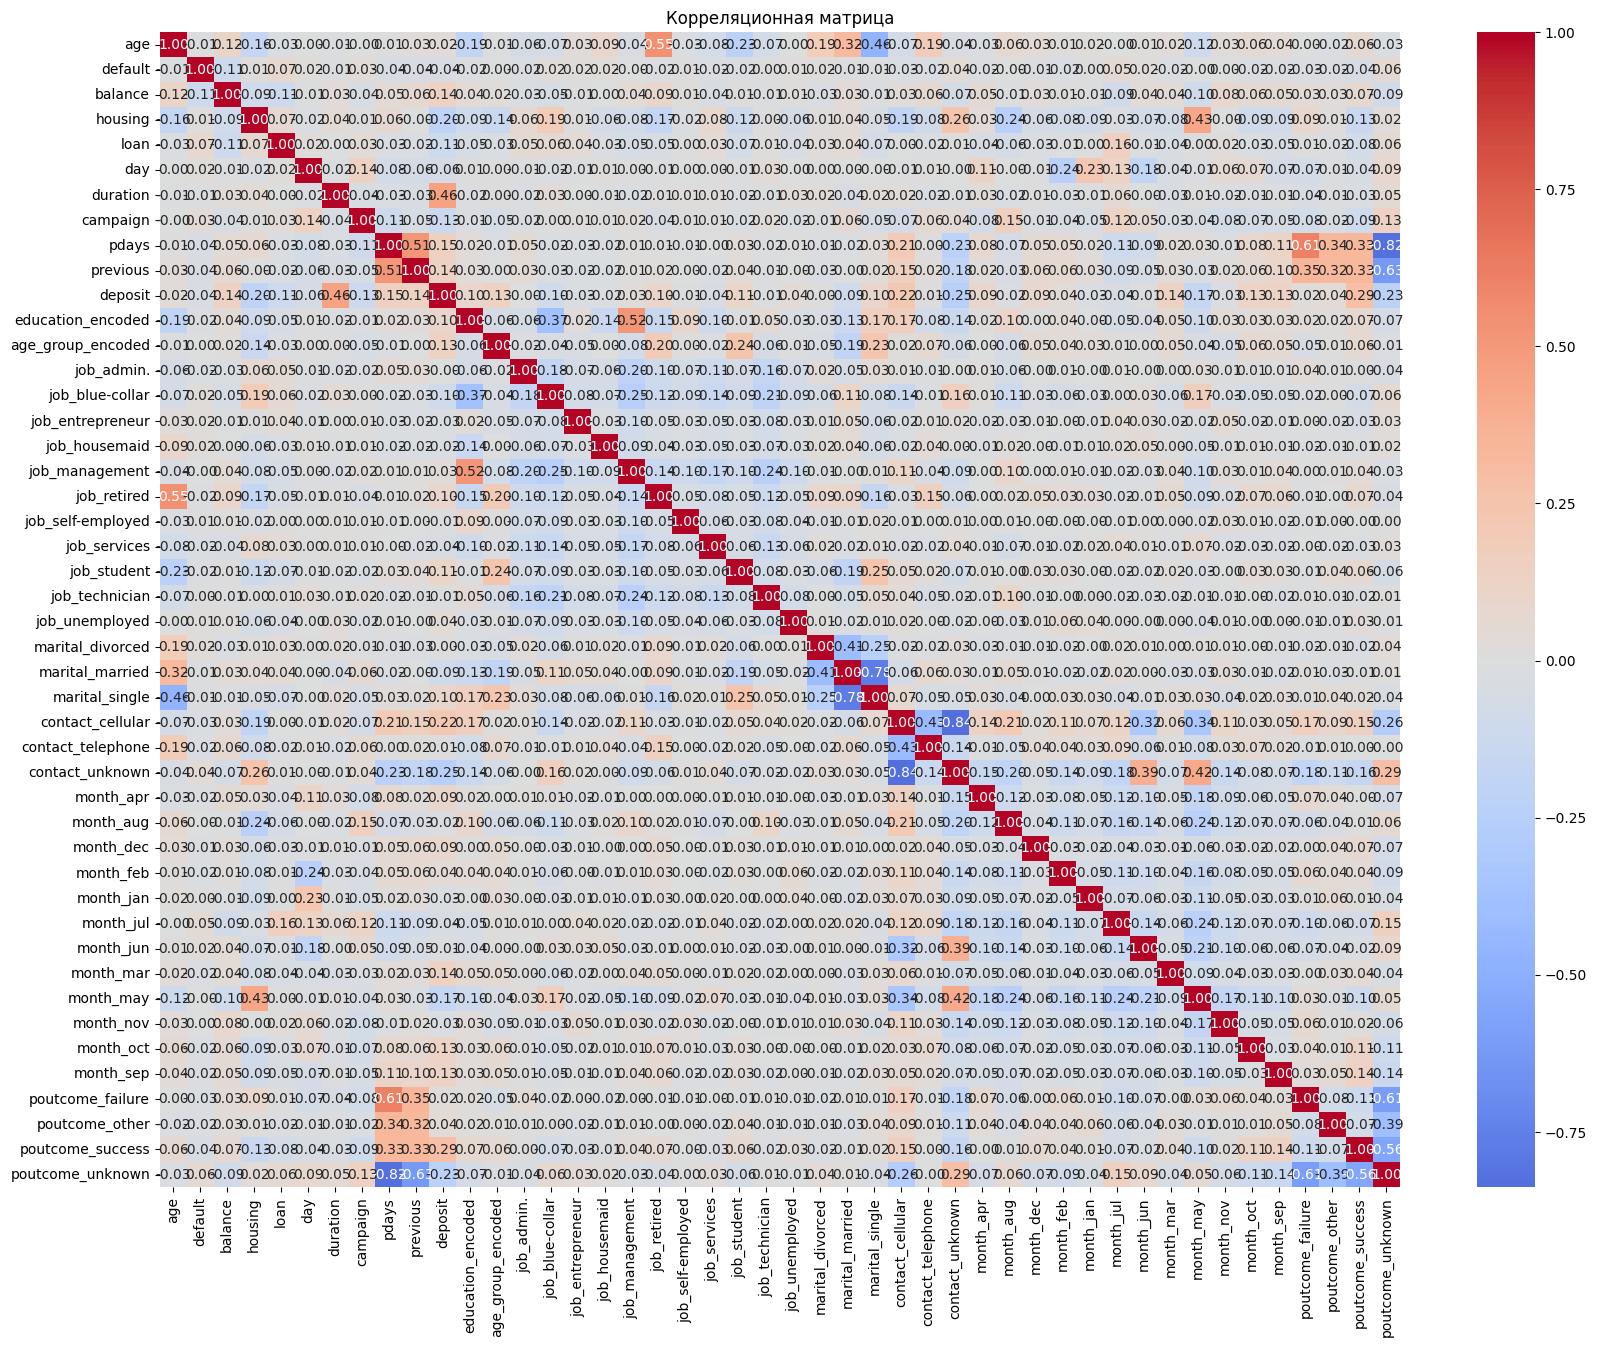

Высокие корреляции (>0.75):
 pdays             poutcome_unknown   -0.824031
marital_married   marital_single     -0.779038
marital_single    marital_married    -0.779038
contact_cellular  contact_unknown    -0.837885
contact_unknown   contact_cellular   -0.837885
poutcome_unknown  pdays              -0.824031
dtype: float64


In [151]:
corr_matrix = df_no_ed.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Корреляционная матрица")
plt.show()

# Поиск высоких корреляций
high_corr = (corr_matrix.abs() > 0.75) & (corr_matrix.abs() < 1.0)
print("Высокие корреляции (>0.75):\n", corr_matrix[high_corr].stack().dropna())

Каково среднее значение целевой переменной на тестовой выборке? Ответ округлим до двух знаков после точки-разделителя.

In [152]:
X = df_no_ed.drop(['deposit'], axis=1)
y = df_no_ed['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [154]:
mean_target = y_test.mean().round(2)
print(f"Среднее значение целевой переменной на тестовой выборке: {mean_target}")

Среднее значение целевой переменной на тестовой выборке: 0.46


Оставим признаки, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.

С помощью SelectKBest отберем 15 признаков, наилучшим образом подходящих для использования в задаче. Отбор реализуем по обучающей выборке, используя параметр score_func = f_classif.


In [156]:
selector = SelectKBest(f_classif, k=15)
X_new = selector.fit_transform(X_train, y_train)
selected_features = X_train.columns[selector.get_support()]
print(selected_features)

Index(['balance', 'housing', 'duration', 'campaign', 'pdays', 'previous',
       'age_group_encoded', 'contact_cellular', 'contact_unknown', 'month_mar',
       'month_may', 'month_oct', 'month_sep', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')




Теперь данные необходимо нормализовать.

Есть разные варианты нормализации, но мы будем использовать min-max-нормализацию.

Нормализуем предикторы в обучающей и тестовой выборках.


In [158]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_selected = X_train[selected_features]  # Отобранные признаки из X_train
X_test_selected = X_test[selected_features]    # Аналогично для теста

# Обучаем scaler на обучающей выборке
scaler.fit(X_train_selected)

# Преобразуем обучающую и тестовую выборки
X_train_scaled = scaler.transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)


Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из тестовой выборки. Ответ округлите до двух знаков после точки-разделителя.

In [159]:
mean_first_feature_test = X_test_scaled[:, 0].mean().round(2)
print(f"Среднее значение первого предиктора в тестовой выборке после нормализации: {mean_first_feature_test}")


Среднее значение первого предиктора в тестовой выборке после нормализации: 0.47




Для начала реализуем самый простой алгоритм, который вам известен — логистическую регрессию. В качестве алгоритма оптимизации будем использовать 'sag', в качестве значения параметра random_state возьмём число 42 и запустим 1000 итераций.

Оцените качество модели на тестовой выборке.


Для получившейся модели вычислите значение accuracy на тестовой выборке. Ответ округлите до двух знаков после точки-разделителя.

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [166]:
model = LogisticRegression(solver='sag', random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
accuracy_rounded = round(accuracy, 3)
print(f"Accuracy на тестовой выборке: {accuracy_rounded}")

Accuracy на тестовой выборке: 0.808




Обучим ещё один алгоритм — решающие деревья. В качестве параметров для начала возьмём следующие:

    criterion = 'entropy';
    random_state = 42.

In [167]:
from sklearn.tree import DecisionTreeClassifier

# Создаем и обучаем модель решающего дерева
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Предсказания на обучающей выборке
y_pred_train = dt_model.predict(X_train_scaled)
accuracy_train = accuracy_score(y_train, y_pred_train)

# Предсказания на тестовой выборке
y_pred_test = dt_model.predict(X_test_scaled)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Accuracy на обучающей выборке: {accuracy_train:.2f}")
print(f"Accuracy на тестовой выборке: {accuracy_test:.2f}")


Accuracy на обучающей выборке: 1.00
Accuracy на тестовой выборке: 0.75


Переберем различные максимальные глубины деревьев и найдем глубину дерева, для которой будет максимальное значение метрики accuracy, но при этом ещё не будет наблюдаться переобучения (т. е. не будет расти качество на обучающей выборке при неизменном качестве на тестовой).

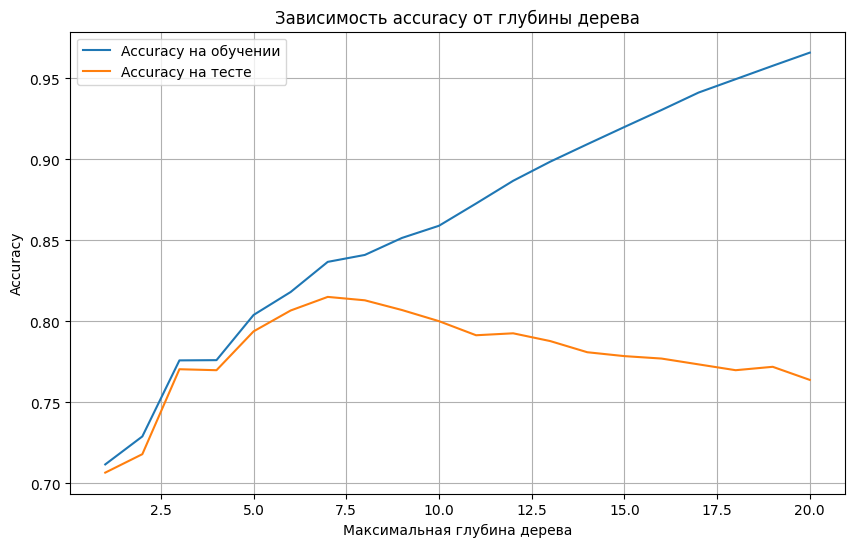

Оптимальная максимальная глубина дерева: 7
Accuracy на обучении: 0.837
Accuracy на тесте: 0.815


In [168]:
max_depths = range(1, 21)  # Перебираем глубины от 1 до 20
train_accuracies = []
test_accuracies = []

for depth in max_depths:
    model = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    model.fit(X_train_scaled, y_train)

    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Визуализируем кривые обучения по глубине дерева
plt.figure(figsize=(10,6))
plt.plot(max_depths, train_accuracies, label='Accuracy на обучении')
plt.plot(max_depths, test_accuracies, label='Accuracy на тесте')
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('Accuracy')
plt.title('Зависимость accuracy от глубины дерева')
plt.legend()
plt.grid(True)
plt.show()

# Находим оптимальную глубину: максимальное тестовое качество без значительного разрыва с обучением
optimal_depth = None
for depth, train_acc, test_acc in zip(max_depths, train_accuracies, test_accuracies):
    # Условие: тестовая точность максимальна, и разница между train и test не слишком велика (например, < 0.05)
    if test_acc == max(test_accuracies) and (train_acc - test_acc) < 0.05:
        optimal_depth = depth
        break

print(f"Оптимальная максимальная глубина дерева: {optimal_depth}")
print(f"Accuracy на обучении: {train_accuracies[optimal_depth-1]:.3f}")
print(f"Accuracy на тесте: {test_accuracies[optimal_depth-1]:.3f}")



Разумеется, у каждой модели может быть множество параметров. Перебирать их вручную, чтобы получить наилучшее качество, долго и трудозатратно. Поэтому мы можем использовать оптимизацию: можно перебрать сразу большое количество комбинаций различных параметров и выбрать тот вариант, при котором модель будет давать наиболее точный прогноз.

Оптимизация гиперпараметров с помощью GridSearch, перебрав следующие параметры:

    'min_samples_split': [2, 5, 7, 10];
    'max_depth':[3,5,7].



Оценим метрику F1 на тестовой выборке для наилучшей комбинации перебираемых параметров

In [169]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

dt = DecisionTreeClassifier(criterion='entropy', random_state=42)

param_grid = {
    'min_samples_split': [2, 5, 7, 10],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(estimator=dt,
                           param_grid=param_grid,
                           scoring='f1',  # или 'f1' если хотите оптимизировать по F1
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train_scaled, y_train)

print("Лучшие параметры:", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred_test = best_model.predict(X_test_scaled)

accuracy_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

print(f"Accuracy на тестовой выборке: {accuracy_test:.3f}")
print(f"F1-score на тестовой выборке: {f1_test:.3f}")



Fitting 5 folds for each of 12 candidates, totalling 60 fits
Лучшие параметры: {'max_depth': 7, 'min_samples_split': 7}
Accuracy на тестовой выборке: 0.814
F1-score на тестовой выборке: 0.804


Обучим случайный лес со следующими параметрами:

    n_estimators = 100;
    criterion = 'gini';
    min_samples_leaf = 5;
    max_depth = 10;
    random_state = 42.



Оценим метрики accuracy и recall для построенной модели на тестовой выборке. В качестве ответов введем значения метрик. Ответ округлим до двух знаков после точки-разделителя.

In [170]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score

# Создаем модель случайного леса с заданными параметрами
rf_model = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    min_samples_leaf=5,
    max_depth=10,
    random_state=42
)

# Обучаем модель на обучающей выборке
rf_model.fit(X_train_scaled, y_train)

# Делаем предсказания на тестовой выборке
y_pred = rf_model.predict(X_test_scaled)

# Вычисляем метрики
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Выводим результаты, округляя до двух знаков
print(f"Accuracy: {accuracy:.3f}")
print(f"Recall: {recall:.3f}")


Accuracy: 0.827
Recall: 0.833


Сравним полученные результаты с моделью градиентного бустинга. Используем градиентный бустинг для решения задачи классификации, задав для него следующие параметры:

    learning_rate = 0.05;
    n_estimators = 300;
    min_samples_leaf = 5;
    max_depth = 5;
    random_state = 42.

Для построенной модели оценим F1 метрику на тестовой выборке.

In [107]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

# Создаем модель градиентного бустинга с заданными параметрами
gb_model = GradientBoostingClassifier(
    learning_rate=0.05,
    n_estimators=300,
    min_samples_leaf=5,
    max_depth=5,
    random_state=42
)

# Обучаем модель на обучающей выборке
gb_model.fit(X_train_scaled, y_train)

# Делаем предсказания на тестовой выборке
y_pred = gb_model.predict(X_test_scaled)

# Вычисляем F1-метрику
f1 = f1_score(y_test, y_pred)

# Выводим результат с округлением до двух знаков
print(f"F1-score на тестовой выборке: {f1:.3f}")


F1-score на тестовой выборке: 0.814


Используем стекинг, объединив те алгоритмы, которые уже использовали ранее: решающие деревья, логистическую регрессию и градиентный бустинг. В качестве метамодели используем модель логистической регрессии.

Параметры оставим те же, что были в алгоритмах в предыдущих заданиях.
Для построенной модели оценим метрику precision на тестовой выборке.

In [171]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score

# Определяем базовые модели с параметрами из предыдущих заданий
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
lr_model = LogisticRegression(solver='sag', random_state=42, max_iter=1000)
gb_model = GradientBoostingClassifier(
    learning_rate=0.05,
    n_estimators=300,
    min_samples_leaf=5,
    max_depth=5,
    random_state=42
)

# Определяем метамодель (логистическая регрессия)
meta_model = LogisticRegression(solver='sag', random_state=42, max_iter=1000)

# Создаем стекинг-классификатор
stacking_clf = StackingClassifier(
    estimators=[
        ('dt', dt_model),
        ('lr', lr_model),
        ('gb', gb_model)
    ],
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1,
    passthrough=False  # не передавать исходные признаки метамодели (по желанию)
)

# Обучаем стекинг на обучающих данных
stacking_clf.fit(X_train_scaled, y_train)

# Предсказываем на тестовой выборке
y_pred = stacking_clf.predict(X_test_scaled)

# Вычисляем precision
precision = precision_score(y_test, y_pred)

print(f"Precision на тестовой выборке: {precision:.3f}")


Precision на тестовой выборке: 0.810




Один из более продвинутых вариантов оптимизации гиперпараметров — фреймворк Optuna. Применим его для оптимизации гиперпараметров. Для перебора возьмем случайный лес и следующие параметры:

    n_estimators = trial.suggest_int('n_estimators', 100, 200, 1);
    max_depth = trial.suggest_int('max_depth', 10, 30, 1);
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1).

In [111]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 16.2 MB/s eta 0:00:00


In [172]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 200)
    max_depth = trial.suggest_int('max_depth', 10, 30)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10)

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        n_jobs=-1
    )

    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    f1 = f1_score(y_test, y_pred)
    return f1

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print(f"Лучшие параметры: {study.best_params}")

# Обучаем модель с лучшими параметрами для вычисления accuracy
best_model = RandomForestClassifier(
    n_estimators=study.best_params['n_estimators'],
    max_depth=study.best_params['max_depth'],
    min_samples_leaf=study.best_params['min_samples_leaf'],
    random_state=42,
    n_jobs=-1
)
best_model.fit(X_train_scaled, y_train)
y_pred_best = best_model.predict(X_test_scaled)

f1_best = f1_score(y_test, y_pred_best)
accuracy_best = accuracy_score(y_test, y_pred_best)

print(f"F1 на тестовой выборке: {f1_best:.2f}")
print(f"Accuracy на тестовой выборке: {accuracy_best:.2f}")


[I 2025-04-27 20:43:31,078] A new study created in memory with name: no-name-d141bfd4-fd60-4bab-966f-56297da05ba2
[I 2025-04-27 20:43:32,058] Trial 0 finished with value: 0.8119440914866582 and parameters: {'n_estimators': 169, 'max_depth': 17, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.8119440914866582.
[I 2025-04-27 20:43:32,990] Trial 1 finished with value: 0.8165980361102312 and parameters: {'n_estimators': 176, 'max_depth': 17, 'min_samples_leaf': 9}. Best is trial 1 with value: 0.8165980361102312.
[I 2025-04-27 20:43:33,593] Trial 2 finished with value: 0.8161974058842139 and parameters: {'n_estimators': 102, 'max_depth': 16, 'min_samples_leaf': 8}. Best is trial 1 with value: 0.8165980361102312.
[I 2025-04-27 20:43:34,289] Trial 3 finished with value: 0.8146263910969793 and parameters: {'n_estimators': 127, 'max_depth': 23, 'min_samples_leaf': 10}. Best is trial 1 with value: 0.8165980361102312.
[I 2025-04-27 20:43:35,258] Trial 4 finished with value: 0.8166614073840

Лучшие параметры: {'n_estimators': 190, 'max_depth': 22, 'min_samples_leaf': 6}
F1 на тестовой выборке: 0.82
Accuracy на тестовой выборке: 0.83
